# Dependencies

In [33]:
import jax.numpy as jnp
import jax
import numpy as np

import matplotlib.pyplot as plt

In [34]:
def init_params(layers:list):
    params = []

    key_ = jax.random.PRNGKey(seed=0)
    for i in range(len(layers)-1):
        key_, subkey_ = jax.random.split(key=key_)
        W = jax.random.normal(key=subkey_, shape=(layers[i],layers[i+1]))
        b = jnp.zeros(shape=(layers[i+1],))

        params.append(dict(weights=W, biases=b))

    return params

def forward(X, params:list): 
    hidden = params[:-1]
    last = params[-1]

    for layer in hidden:
        Z = jnp.dot(X,layer['weights']) + layer['biases']
        X = jax.nn.relu(Z)

    A = jnp.dot(X,last['weights']) + last['biases']

    return A

def loss(X,Y,params:list):
    A = forward(X,params)
    return jnp.mean((A-Y)**2)

@jax.jit
def update(X,Y,params:list,lr):
    # Computing Gradients
    grads = jax.grad(loss, argnums=(2))(X,Y,params)

    # SGD Update
    return jax.tree_map(lambda p,g:p-lr*g, params, grads)

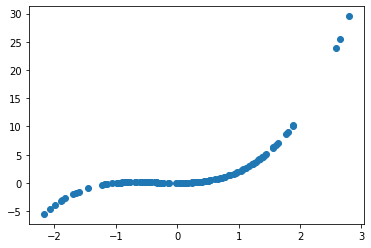

In [36]:
X = np.random.normal(size=(128, 1))
Y = X**2 + X**3

plt.scatter(X,Y)

In [37]:
params = init_params([1,128,128,1])

num_iter = 5000
lr = 0.0001

num_epochs = 5000
for _ in range(num_epochs):
    params = update(X, Y, params, lr)

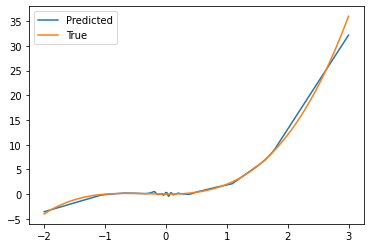

In [39]:
X_test = np.expand_dims(np.linspace(-2,3,1000), axis=-1)
Y_test = X_test**2 + X_test**3

plt.plot(X_test, forward(X_test, params), label="Predicted")
plt.plot(X_test, Y_test, label="True")
plt.legend()

In [81]:
forward(X_test, params)

DeviceArray([[0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
             [0.7206552],
            